In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

In [11]:
data = pd.read_csv('C:/Users/Rakhman/Anaconda3/dataBLE/adult.data.csv')

In [13]:
df = pd.read_csv('C:/Users/Rakhman/Anaconda3/dataBLE/howpop_train.csv')

In [14]:
df.shape

(134137, 17)

In [15]:
df.head(3).T


,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [17]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [18]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [20]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [21]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [22]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [35]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


In [41]:
pd.crosstab(df['year'], df['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2008,435,496,545,597,635,599,674,677,914,712,661,798
2009,797,812,890,840,755,733,891,956,955,1021,1084,1049
2010,1010,1203,1257,1068,1012,1090,1152,1029,1129,1096,990,1055
2011,1124,1072,1172,1178,1159,1439,1292,1315,1363,1347,1367,1235
2012,1167,1178,1416,1330,1388,1335,1340,1318,1331,1421,1435,1313
2013,1187,1186,1327,1298,1129,1244,1244,1291,1355,1456,1452,1368
2014,1133,1218,1238,1402,1193,1237,1372,1228,1408,1595,1462,1694
2015,1504,1793,2189,2110,1799,2004,2111,1849,1944,2030,2035,2084
2016,1717,1819,2115,1910,1726,1498,1278,1278,1482,1493,0,0


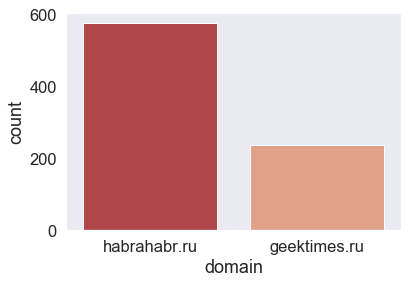

In [53]:
a = df[df['month']==3]
sns.countplot(a[a['dayofweek']==6]['domain'])

In [52]:
a = df[df['month']==3]
a[a['dayofweek']==6]['domain'].value_counts()

habrahabr.ru    577
geektimes.ru    237
Name: domain, dtype: int64

In [56]:
df[df['month']==3]['domain'].value_counts()

habrahabr.ru    8747
geektimes.ru    3402
Name: domain, dtype: int64

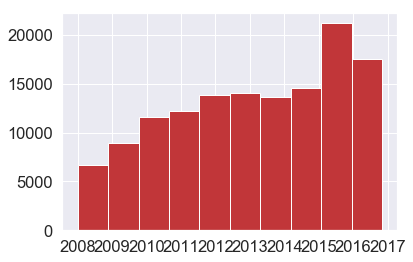

In [57]:
df['published'].hist()

In [61]:
df.sort_values(by='comments', ascending=False)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2
5018,https://habrahabr.ru/company/tm/blog/39689/,habrahabr.ru,39689,2008-09-12 09:44:00,NaN,misc,False,17,"Hello, world!",2194,16,9400,NaN,NaN,2008,9,5,9
65285,https://geektimes.ru/post/171853/,geektimes.ru,171853,2013-03-06 20:07:00,@vadimus,NaN,False,2220,Лучшие компьютерные игры всех времен и народов...,1887,392,160000,170.0,29.0,2013,3,3,20
38742,https://geektimes.ru/post/123122/,geektimes.ru,123122,2011-06-30 17:10:00,@MetallicAt,NaN,False,1390,Раздача слонов или инвайты на Google+,1829,17,1200,275.0,50.0,2011,6,4,17
48453,https://habrahabr.ru/post/138291/,habrahabr.ru,138291,2012-02-16 01:04:00,@BannedMi,admin,False,3378,Ещё +2Гб для вашего DropBox аккаунта. На сей р...,1729,152,12100,285.0,54.0,2012,2,4,1
68588,https://habrahabr.ru/company/opera/blog/181181/,habrahabr.ru,181181,2013-05-28 10:14:00,NaN,develop,False,9436,Первая версия Opera 15 для компьютеров,1585,83,185000,184.0,88.0,2013,5,2,10
126328,https://geektimes.ru/post/276000/,geektimes.ru,276000,2016-05-18 21:43:00,@alizar,NaN,False,5207,Завершено самое масштабное исследование влияни...,1578,234,165000,76.0,7.0,2016,5,3,21
59252,https://habrahabr.ru/post/155041/,habrahabr.ru,155041,2012-10-17 04:21:00,@Shpankov,misc,False,6378,Зачем нужны попы в ВУЗе?,1475,242,154000,392.0,66.0,2012,10,3,4
34239,https://habrahabr.ru/post/115365/,habrahabr.ru,115365,2011-03-13 18:19:00,@Budda40,admin,True,1,Чего вам не хватает для полного перехода с win...,1381,25,13400,163.0,96.0,2011,3,7,18
64786,https://habrahabr.ru/post/170487/,habrahabr.ru,170487,2013-02-24 00:31:00,@yaPetrovich,admin,False,1388,Антивирус Бабушкина,1261,223,424000,474.0,78.0,2013,2,7,0


In [64]:
df['published'][1]

Timestamp('2008-01-01 18:30:00')

In [70]:
df[df['author']=='@alizar']['votes_minus'].sum()
df[df['author']=='@Mordatyj']['votes_minus'].sum()
df[df['author']=='@Mithgol']['votes_minus'].sum()
df[df['author']=='@ilya42']['votes_minus'].sum()

3183.0

In [71]:
df[df['author']=='@alizar']['votes_minus'].sum()


41734.0

In [72]:
df[df['author']=='@Mordatyj']['votes_minus'].sum()


4057.0

In [73]:
df[df['author']=='@Mithgol']['votes_minus'].sum()


11367.0

In [74]:
df[df['author']=='@ilya42']['votes_minus'].sum()

3183.0

In [77]:
df[df[df['dayofweek']==1]['published'][1].time.hours<12].values_count()

KeyError: 1